In [44]:
import pandas as pd
import numpy as np
import sys

import datetime
from datetime import date, time
from datetime import datetime

# Matplotlib Library
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.axes as ax

import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.colors as col
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap

import matplotlib.ticker as ticker

import seaborn as sns

import plotly.express as px

In [45]:
SIO_temp=pd.read_excel("../data/LaJolla_TEMP_1916-20240506.xls",skiprows=46) #change excel filename

In [46]:
#SIO_temp.drop(SIO_temp.index[0:45], inplace=True) #change n for [0:n], where n=row containing true headers desired
SIO_temp=pd.read_excel("../data/LaJolla_TEMP_1916-20240506.xls",skiprows=46)
SIO_temp=SIO_temp.reset_index(drop=True)
SIO_temp[['SURF_TEMP_C','BOT_TEMP_C']]=SIO_temp[['SURF_TEMP_C','BOT_TEMP_C']].values.astype(float)
SIO_temp['DATETIME']=SIO_temp['YEAR'].astype(str)+'-'+SIO_temp['MONTH'].astype(str)+'-'+SIO_temp['DAY'].astype(str)
SIO_temp['DATETIME']=pd.to_datetime(SIO_temp['DATETIME'])
SIO_temp.to_csv('SIO_TEMP.csv', sep=',', na_rep='NaN', header=True, index=False)

In [47]:
SIO=pd.read_csv('SIO_TEMP.csv', sep=',')
SIO.loc[SIO['YEAR']==2024]
SIO_cut=SIO.drop(SIO.index[39213:])
SIO_cut.reset_index(drop=True)
SIO_cut.loc[SIO_cut['YEAR']==1917]
SIO_cut_final=SIO_cut.drop(SIO_cut.index[:132])
SIO_cut_final

,YEAR,MONTH,DAY,TIME_PST,TIME_FLAG,SURF_TEMP_C,SURF_FLAG,BOT_TEMP_C,BOT_FLAG,DATETIME
132,1917,1,1,NaN,NaN,NaN,0,NaN,NaN,1917-01-01
133,1917,1,2,NaN,NaN,11.5,0,NaN,NaN,1917-01-02
134,1917,1,3,NaN,NaN,11.9,0,NaN,NaN,1917-01-03
135,1917,1,4,NaN,NaN,11.5,0,NaN,NaN,1917-01-04
136,1917,1,5,NaN,NaN,11.7,0,NaN,NaN,1917-01-05
...,...,...,...,...,...,...,...,...,...,...
39208,2023,12,27,1030.0,0.0,17.1,0,17.0,0.0,2023-12-27
39209,2023,12,28,1548.0,0.0,17.1,0,NaN,0.0,2023-12-28
39210,2023,12,29,1254.0,0.0,16.9,0,NaN,0.0,2023-12-29
39211,2023,12,30,NaN,0.0,NaN,0,NaN,0.0,2023-12-30


In [48]:
# Check if 'SURF_TEMP_C' column contains numeric values
is_numeric = pd.to_numeric(SIO_cut_final['SURF_TEMP_C'], errors='coerce').notna()

# Use boolean indexing to filter out rows with non-numeric values
SIO_cut_final = SIO_cut_final[is_numeric]

In [49]:
non_numeric_values = SIO_cut_final['SURF_TEMP_C'][~SIO_cut_final['SURF_TEMP_C'].apply(pd.to_numeric, errors='coerce').notna()].unique()
print(non_numeric_values)

[]


In [50]:
# Calculate the mean of 'SURF_TEMP_C'
surf_mean_SIO = SIO_cut_final['SURF_TEMP_C'].mean()

# Group by 'YEAR' and calculate the mean of 'SURF_TEMP_C' for each year
SIO_avg_surf = SIO_cut_final.groupby(['YEAR'], as_index=False)['SURF_TEMP_C'].mean()

# Calculate the difference between the mean and each year's value
SIO_avg_surf['DIFF_MEAN_AVG_SURF'] = SIO_avg_surf['SURF_TEMP_C'] - surf_mean_SIO

SIO_avg_surf

,YEAR,SURF_TEMP_C,DIFF_MEAN_AVG_SURF
0,1917,16.742715,-0.539556
1,1918,17.385113,0.102842
2,1919,16.810032,-0.472239
3,1920,16.576177,-0.706094
4,1921,16.536223,-0.746049
...,...,...,...
102,2019,18.681795,1.399523
103,2020,18.447528,1.165257
104,2021,17.849972,0.567700
105,2022,18.289863,1.007592


In [51]:
from PIL import Image

# Open the image file
img = Image.open('SIO_surf_stripes_sign_parks.png')

# Get image dimensions
width, height = img.size

print(f"Image dimensions: {width}x{height} pixels")

Image dimensions: 3426x4506 pixels


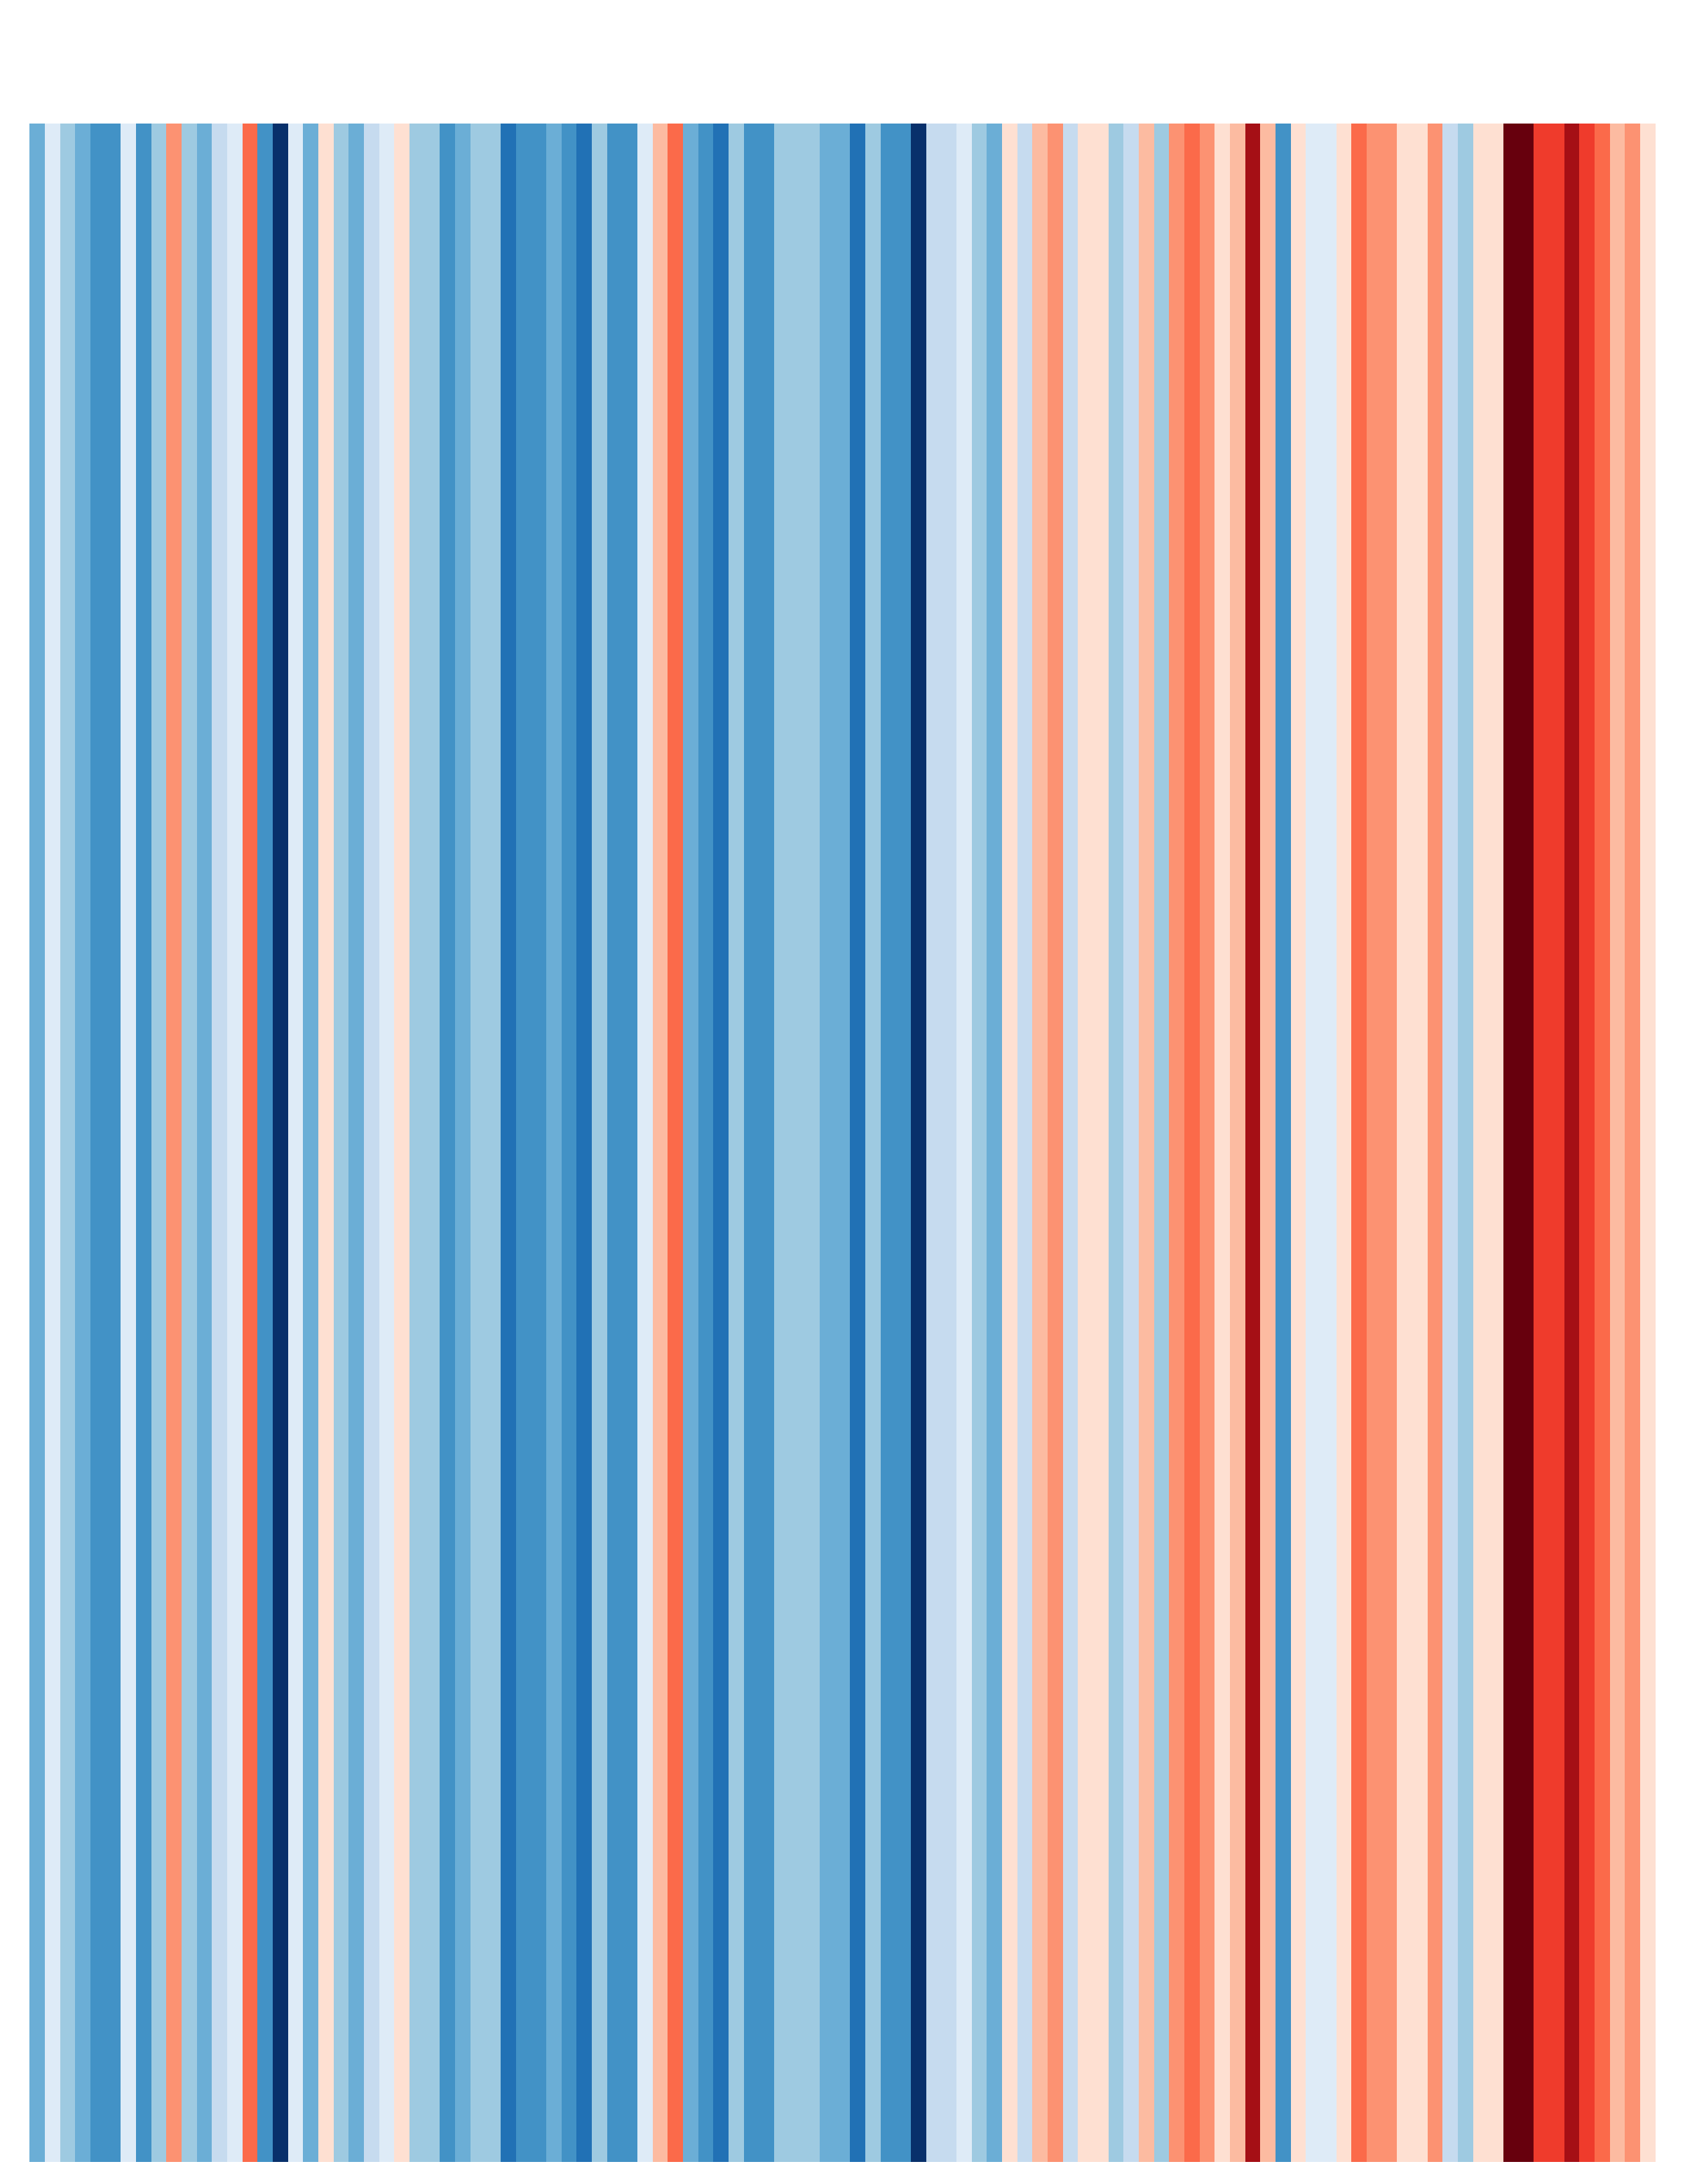

In [55]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import numpy as np
from PIL import Image

# Desired plot area dimensions in pixels
plot_width_px = 2880
plot_height_px = 3780
dpi = 300

# Add extra padding to the figure size to account for axes and labels
padding_factor = 1  # Adjust this factor as needed
fig_width_in = (plot_width_px / dpi) * padding_factor
fig_height_in = (plot_height_px / dpi) * padding_factor

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(fig_width_in, fig_height_in), dpi=dpi)

# Colours - Choose the colour map - 8 blues and 8 reds
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d'])

# Linearly normalizes data into the [0.0, 1.0] interval
norm = mpl.colors.Normalize(SIO_avg_surf['DIFF_MEAN_AVG_SURF'].min(), SIO_avg_surf['DIFF_MEAN_AVG_SURF'].max())

# Plot bars
bar = ax.bar(SIO_avg_surf['YEAR'], 1, color=cmap(norm(SIO_avg_surf['DIFF_MEAN_AVG_SURF'])), width=1, zorder=2)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_yticks([])

# Set x-ticks every 20 years starting from 1920
plt.xlim([1916, 2024])
#plt.xticks(np.arange(1920, 2025, 20), fontsize=15)
plt.xticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.patch.set_facecolor('xkcd:white')

# Save the figure with tight bounding box
plt.savefig('SIO_surf_stripes_sign_parks_large.png', dpi=dpi, bbox_inches='tight', pad_inches=0)

In [74]:
from PIL import Image, ImageChops

img = Image.open("SIO_surf_stripes_sign_parks_large.png")
width, height = img.size
background_color = img.getpixel((0, 0))

# Iterate over every pixel
top = None
bottom = None
left = None
right = None
for y in range(height):
    pixel = img.getpixel((width // 2, y))
    if (pixel != background_color) and top is None:
        top = y
    elif (pixel == background_color) and top is not None:
        bottom = y
        break

for x in range(width):
    print(pixel)
    if (pixel != background_color) and left is None:
        left = x
    elif (pixel == background_color) and left is not None:
        right = x
        break
if right is None:
    right = width
if bottom is None:
    bottom = height

print(f"Top: {top}, Bottom: {bottom}, Left: {left}, Right: {right}")
cropped = img.crop((left, top, right, bottom))
resized = cropped.resize((2880, 3780))
resized.save("SIO_surf_stripes_sign_parks_large_resized.png")
resized.show()


(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 214, 255)
(107, 174, 21